#**Primera pre-entrega**
###Coderhouse | Data Science - Comisión 46260
###Alumno: Sebastián Ortiz | DNI 39513216

### **Primera idea: datasets de Videojuegos**

> La idea es contar con 3 datasets, que tienen una relación con varias llaves primarias. Los Datasets muestran el rendimiento en ventas en diferentes mercados de varios videojuegos, así como los reviews en Vandal (sitio especializado en videojuegos), y las ventas de cada consola.

Descripción de los datasets:

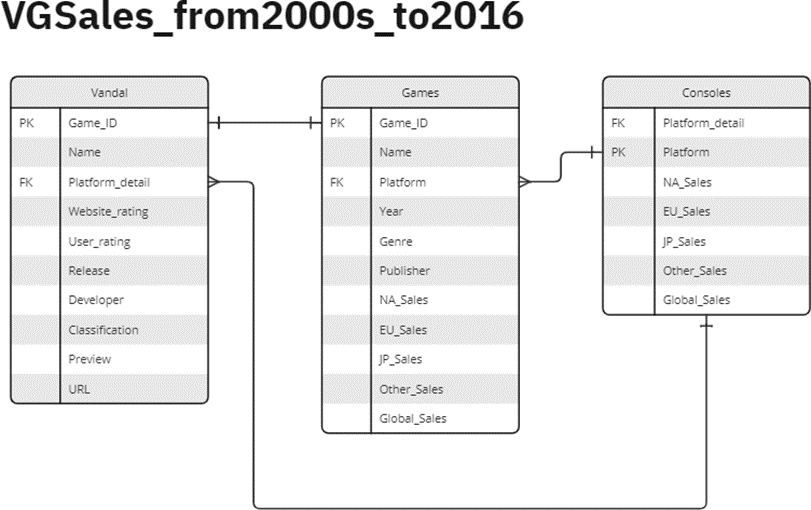



In [1]:
import pandas as pd
import numpy as np
#1° paso: importamos las libraries necesarias para la manipulación de datos

In [2]:
vandal = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/vandal_coment_clean.xlsx')
vandal.head()

#2° paso: importo el dataset correspondiente: en este caso, traje el dataset en XLSX dado que si lo subo en formato CSV, pesa >13 mb, por lo que Colab no lo lee.

,Game_ID,Game,Platform_detail,Platform,website_rating,user_rating,release,developer,classification,preview,url
0,¡Hassidotu!_PS4,¡Has sido tu!,PlayStation 4,PS4,7.5,7.69,2017-07-04,Wish Studios & Sony,PEGI +12,La razon por la que han existido las consolas ...,https://vandal.elespanol.com/analisis/PlayStat...
1,IDARB_One,IDARB,Xbox One,One,8.2,7.00,2015-02-03,Other Ocean Interactive,PEGI +3,"Es un fenomeno curioso, pero bien podriamos de...",NaN
2,007Racing_PS,007 Racing,PlayStation,PS,6.9,4.88,2001-01-01,EA Games & Electronic Arts,NaN,"Bond, James BondCon la reciente tirada de titu...",NaN
3,007:AgenteenFuegoCruzado_GC,007: Agente en Fuego Cruzado,GameCube,GC,7.7,6.30,2002-01-01,EA Games & Electronic Arts,NaN,"No podia ser de otra manera Bond vuelve, no po...",https://vandal.elespanol.com/analisis/gcn/007-...
4,007:Nightfire_GC,007: Nightfire,GameCube,GC,8.7,6.93,2002-11-29,Eurocom & EA Games,NaN,Licencia para matarAunque son muchos los jueg...,https://vandal.elespanol.com/analisis/gcn/007-...


In [3]:

consoles = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cgsales_clean.csv', sep=';')
consoles.head()


,Platform_detail,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,PlayStation 2,PS2,53.65,55.28,23.18,26.59,158.70
1,Nintendo DS,DS,57.92,51.84,32.99,11.28,154.02
2,Nintendo Switch,NS,44.60,31.56,28.71,19.04,123.91
3,Game Boy,GB,43.18,40.05,32.47,2.99,118.69
4,PlayStation 4,PS4,38.14,45.83,9.61,23.43,117.02


In [4]:
games = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/vgsales_clean.csv', sep=';')
games.head()

,Game_ID,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,WiiSports_Wii,Wii Sports,Wii,2006,Sports,Nintendo,"41,49","29,02","3,77","8,46","82,74"
1,MarioKartWii_Wii,Mario Kart Wii,Wii,2008,Racing,Nintendo,"15,85","12,88","3,79","3,31","35,82"
2,WiiSportsResort_Wii,Wii Sports Resort,Wii,2009,Sports,Nintendo,"15,75","11,01","3,28","2,96","33,00"
3,NewSuperMarioBros._DS,New Super Mario Bros.,DS,2006,Platform,Nintendo,"11,38","9,23","6,50","2,90","30,01"
4,WiiPlay_Wii,Wii Play,Wii,2006,Misc,Nintendo,"14,03","9,20","2,93","2,85","29,02"


In [74]:
#Shapes:

print('La dimensión del df vanadal es de:', vandal.shape)
print('La dimensión del df games es de:', games.shape)
print('La dimensión del df consoles es de:', consoles.shape)
###
print('El df vandal tiene el siguiente tipo:', type(vandal))
print('El df games tiene el siguiente tipo:', type(games))
print('El df consoles tiene el siguiente tipo:', type(consoles))

La dimensión del df vanadal es de: (11892, 11)
La dimensión del df games es de: (3161, 11)
La dimensión del df consoles es de: (83, 7)
El df vandal tiene el siguiente tipo: <class 'pandas.core.frame.DataFrame'>
El df games tiene el siguiente tipo: <class 'pandas.core.frame.DataFrame'>
El df consoles tiene el siguiente tipo: <class 'pandas.core.frame.DataFrame'>


###Principales variables:





In [11]:
#Cantidad de ventas de consolas:

ventas_global = sum(consoles['Global_Sales'])
print('Cantidad total de ventas:',ventas_global)

ventas_usa = sum(consoles['NA_Sales'])
print('Cantidad de ventas en USA:',ventas_usa)

Cantidad total de ventas: 1787.839999999999
Cantidad de ventas en USA: 723.0599999999998


In [24]:
#Cantidad de ventas por Género:

ventas_genre = games.groupby('Platform').sum()
ventas_genre.head

<ipython-input-24-d85e8acfa1b9>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ventas_genre = games.groupby('Platform').sum()


<bound method NDFrame.head of              Year
Platform         
3DS        157009
DC          16002
DS         433605
GBA        148198
GC         242396
N64         20004
PC         838230
PS          42003
PS2        679336
PS3       1055636
PS4        342537
PSP        325245
PSV        173173
Wii        409805
WiiU       114774
X360      1021140
XB         330623>

In [23]:
#Ventas por plataforma

ventas_platform = consoles.groupby('Platform').sum()
ventas_platform.head

<ipython-input-23-a1cbdf42d699>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ventas_platform = consoles.groupby('Platform').sum()


<bound method NDFrame.head of           NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
Platform                                                         
2600         23.54      3.35      2.36         0.75         30.00
3DO           0.00      0.00      0.00         0.00          2.00
3DS          25.47     20.45     24.67         5.35         75.94
5200          1.00      0.00      0.00         0.00          1.00
7800          3.77      0.00      0.00         0.00          3.77
...            ...       ...       ...          ...           ...
Wii          45.51     33.12     12.77        10.23        101.63
WiiU          6.15      3.27      3.33         0.82         13.56
X360         47.09     25.08      1.66        11.90         85.73
XB           15.77      7.17      0.47         1.24         24.65
XS           11.45      5.74      0.44         3.72         21.35

[82 rows x 5 columns]>

In [36]:
#Comentarios por plataforma

coments_plat = vandal.groupby('Platform').mean()
coments_plat.head

<ipython-input-36-c3da91361f80>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  coments_plat = vandal.groupby('Platform').mean()


<bound method NDFrame.head of           website_rating  user_rating
Platform                             
3DS             6.719094     7.452136
DC              7.408547     7.017436
DS              6.477618     5.967187
GBA             6.528571     7.388776
GC              6.054327     7.063365
Mobile          6.802467     4.438795
N64             6.525926     7.966667
NGage           2.111111     8.143333
NS              5.864815     5.619938
One             6.967239     5.544429
PC              6.543821     6.283466
PS              7.223790     6.333145
PS2             6.685503     6.977204
PS3             6.761583     7.023380
PS4             6.770718     6.314429
PSP             5.730699     7.030942
PSV             5.869516     6.588689
Wii             5.831677     6.601573
WiiU            6.359113     6.784335
X360            7.073596     6.905390
XB              6.245779     6.913474>

In [38]:
#Comentarios por desarrollador

coments_dev = vandal.groupby('developer').mean()
coments_dev.head

<ipython-input-38-6bd0f1c4ad82>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  coments_dev = vandal.groupby('developer').mean()


<bound method NDFrame.head of                               website_rating  user_rating
developer                                                
3909                                   7.500     7.890000
.dat & Kalypso                         7.000     8.500000
10 Tons                                7.700     3.750000
10Tons                                 6.475     2.490000
10tons                                 7.200     4.771667
...                                      ...          ...
tri-Crescendo & Namco Bandai           8.000     7.660000
ustwo                                  4.750     8.615000
ustwo Games                            9.500     8.000000
xii games & Wadjet Eye Games           8.000     6.000000
zSlide & Atari                         7.000     7.000000

[3621 rows x 2 columns]>

### **Segunda idea: dataset de Reviews de Threads**

> La idea es, desde el rol de Product Manager de Threads, analizar el resultado de las comentarios que recibió la App en varios países. El fin del análisis en encontrar posibilidades de mejora, ver el impacto de caídas del sitio en los comentarios y la temperatura de cómo se comunican los usuarios.

Descripción de los datasets:



```
threads.shape = (36943, 14)
```



In [40]:
threads = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/37000_reviews_of_thread_app.csv')

threads.head()

,Unnamed: 0,source,review_id,user_name,review_title,review_description,rating,thumbs_up,review_date,developer_response,developer_response_date,appVersion,laguage_code,country_code
0,0,Google Play,7cd90e5b-4829-43b9-9fb4-c8c6d1e339c1,Eddie Clark Jr.,NaN,Good,5,0.0,2023-08-07 19:14:36,NaN,NaN,294.0.0.27.110,en,us
1,1,Google Play,6deb8265-2bac-4524-bcb6-f90829fa4e69,Rasa RT,NaN,Weak copy of Twitter,1,0.0,2023-08-07 19:07:04,NaN,NaN,NaN,en,us
2,2,Google Play,91ef61ce-0f05-4f3b-b3d3-5d19cd408ab8,SITI NUR HAFIZA BINTI AZIZ,NaN,i wish threads have a save button for images a...,3,0.0,2023-08-07 18:57:07,NaN,NaN,294.0.0.27.110,en,us
3,3,Google Play,b7721b78-6b77-4f8c-a1d3-a854af4c1f0f,Asap Khalifah,NaN,Love it,5,0.0,2023-08-07 18:37:16,NaN,NaN,NaN,en,us
4,4,Google Play,c89ef522-c94c-4171-878f-1d672dce7f11,Syed Hussein,NaN,Very god,5,0.0,2023-08-07 18:14:15,NaN,NaN,NaN,en,us


In [70]:
print('La dimensión del df es de:', threads.shape)
print('El df tiene el siguiente tipo:', type(threads))

La dimensión del df es de: (36943, 14)
El df tiene el siguiente tipo: <class 'pandas.core.frame.DataFrame'>


###Principales variables:

In [51]:
#Promedio de valoraciones por sistema operativo

stores = threads.groupby('source')['rating'].mean()
stores

source
App Store      2.95550
Google Play    3.37192
Name: rating, dtype: float64

In [63]:
#Promedio por país

stores_len = len(threads['rating'])
print('El total de registros es de:',stores_len)

El total de registros es de: 36943


In [76]:
stores = threads.groupby('review_date')['rating'].mean()
stores.head

<bound method NDFrame.head of review_date
2023-07-05 23:09:17    5.0
2023-07-05 23:16:15    5.0
2023-07-05 23:21:24    2.0
2023-07-05 23:23:19    1.0
2023-07-05 23:24:00    5.0
                      ... 
2023-08-07 18:14:15    5.0
2023-08-07 18:37:16    5.0
2023-08-07 18:57:07    3.0
2023-08-07 19:07:04    1.0
2023-08-07 19:14:36    5.0
Name: rating, Length: 35665, dtype: float64>

In [81]:
#La idea es realizar un análisis exploratorio de los comentarios de los usuarios y sus principales puntos de valoración, por lo que voy a requerir la siguiente variable:

coments_th = threads.groupby('review_description')['rating'].mean()
coments_th.head

<bound method NDFrame.head of review_description
" Most Excellent App By Threads "                                                                                                                                                                                    5.0
"Competition is fine but cheating is not" you're accuse of violation of IPR                                                                                                                                          1.0
"Excited to join Threads! Ready to connect, share, and inspire with amazing individuals. Let's weave our stories together, creating a tapestry of growth and positivity. Here's to new beginnings! 🧵✨ #ThreadsApp    1.0
"Excited to join the Thread ! Ready to connect, learn, and share insights. Looking forward to engaging with this vibrant community. #NewBeginnings"                                                                  5.0
"Fed"iverse? Come on, now 🤣 This is diet Twitter with added censorship. Nothing mor

### **Tercera idea: Recomendación de Animes**

> Busco generar con esta idea la manera de recomendar nuevos animes a usuarios que ya hayan visto opciones similares. Es una manera de mostrar y predecir qué puede tener éxito al momento de recomendar.

Descripción de los datasets:



```
anime.shape = (19311, 12)
```



In [85]:
anime = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/animes.csv')
anime.head

<bound method NDFrame.head of          uid                                        title  \
0      28891                      Haikyuu!! Second Season   
1      23273                      Shigatsu wa Kimi no Uso   
2      34599                                Made in Abyss   
3       5114             Fullmetal Alchemist: Brotherhood   
4      31758             Kizumonogatari III: Reiketsu-hen   
...      ...                                          ...   
19306  32979                                Flip Flappers   
19307    123                                Fushigi Yuugi   
19308   1281                             Gakkou no Kaidan   
19309    450  InuYasha Movie 2: Kagami no Naka no Mugenjo   
19310     87     Mobile Suit Gundam: Char's Counterattack   

                                                synopsis  \
0      Following their participation at the Inter-Hig...   
1      Music accompanies the path of the human metron...   
2      The Abyss—a gaping chasm stretching down into ... 

In [88]:
print('La dimensión del df es de:', anime.shape)
print('El df tiene el siguiente tipo:', type(anime))

La dimensión del df es de: (19311, 12)
El df tiene el siguiente tipo: <class 'pandas.core.frame.DataFrame'>


###Principales variables:

In [90]:
#Cantidad de episodios promedio por año de lanzamiento:

anime_epis = anime.groupby('aired').mean()
anime_epis.head

<ipython-input-90-dd0fdcb69632>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  anime_epis = anime.groupby('aired').mean()


<bound method NDFrame.head of                                  uid  episodes      members    popularity  \
aired                                                                       
1917                    23651.000000       1.0   189.000000  13573.000000   
1924                    20346.666667       1.0   359.000000  12752.333333   
1925                    25356.333333       1.0   277.666667  12761.666667   
1926                    27935.400000       1.0   372.800000  12671.800000   
1927                    30176.000000       1.0   193.000000  13536.000000   
...                              ...       ...          ...           ...   
Sep, 2011 to Oct, 2013  38420.000000       7.0    92.000000  15499.000000   
Sep, 2012               32345.000000       1.0   256.000000  12592.000000   
Sep, 2012 to ?          38123.000000      52.0    81.000000  15726.000000   
Sep, 2019               40495.000000       1.0    33.000000  16302.000000   
Sep, 2020               35960.000000       1.0

In [92]:
#Cantidad de episodios promedio por año de lanzamiento:

coments_anime = anime.groupby('synopsis')['popularity'].mean()
coments_anime.head

<bound method NDFrame.head of synopsis
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         8066.777778
 (360° VR) Animation Video by Asami Ike.                    